In [117]:
import os
from random import sample

import cv2
from matplotlib import pyplot as plt

random_subset = sample(os.listdir('media/captchas'), 5)
print(random_subset)

['6ofa.png', 'juc8.png', '9ah2.png', '25g3.png', 'fu37.png']


In [118]:
def clean_up_single_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # There are never letters before x 50 and never after x 150, crop
    img = img[0:50, 50:150]
    img = cv2.fastNlMeansDenoising(img, None, 85, 5, 21)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)[1]
    
    return img

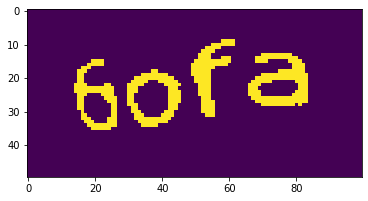

In [119]:
cleaned_0 = clean_up_single_image('media/captchas/' + random_subset[0])
plt.imshow(cleaned_0)

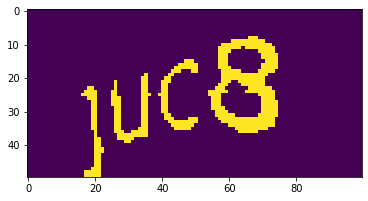

In [120]:
cleaned_1 = clean_up_single_image('media/captchas/' + random_subset[1])
plt.imshow(cleaned_1)

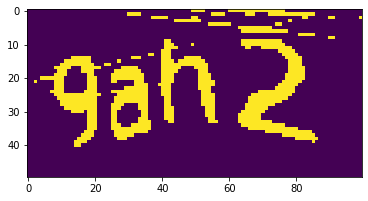

In [121]:
cleaned_2 = clean_up_single_image('media/captchas/' + random_subset[2])
plt.imshow(cleaned_2)

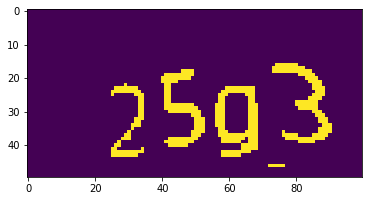

In [122]:
cleaned_3 = clean_up_single_image('media/captchas/' + random_subset[3])
plt.imshow(cleaned_3)

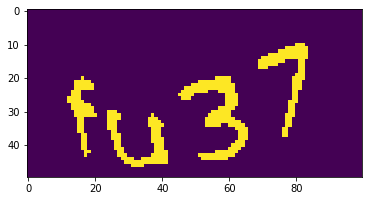

In [140]:
cleaned_4 = clean_up_single_image('media/captchas/' + random_subset[4])
plt.imshow(cleaned_4)

[11, 23, 45, 68, 84]


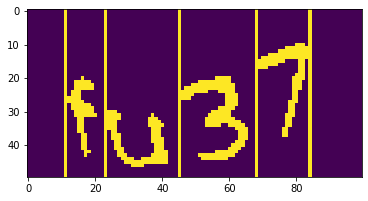

In [135]:
# CAPTCHAs are always 4 symbols long, find each start and end of a letter based on
# the assumption the clean-up worked well enough and there are clear blanks,
# even a low double-digit success rate should be more than enough in the end
column_sums = []
separator_columns = []
is_traversing_letter = False
cleaned_4_copy = cleaned_4.copy()
for x in range(0, 100):
    column_sum = 0
    for y in range(0, 50):
        column_sum += cleaned_4_copy[y][x]
    if not is_traversing_letter and column_sum >= (2 * 255):
        # At least 2 coloured pixels, presume there's a letter starting here
        separator_columns.append((x - 1))
        is_traversing_letter = True
    if is_traversing_letter and column_sum == 0:
        # Blank here
        is_traversing_letter = False
        # Last letter ended
        if len(separator_columns) == 4:
            separator_columns.append(x)
    if len(separator_columns) == 5:
        # We have enough, stop
        break
print(separator_columns)
for letter_column in separator_columns:
    cv2.line(cleaned_4_copy, (letter_column, 0), (letter_column, 50), (255,255,255), 1)
plt.imshow(cleaned_4_copy)

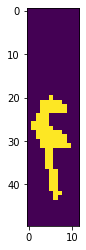

In [142]:
letter_1 = cleaned_4[0:50, separator_columns[0]:separator_columns[1]]
plt.imshow(letter_1)

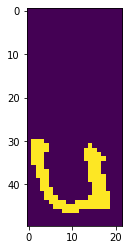

In [143]:
letter_2 = cleaned_4[0:50, separator_columns[1]:separator_columns[2]]
plt.imshow(letter_2)

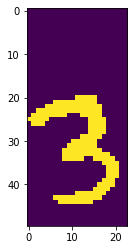

In [144]:
letter_3 = cleaned_4[0:50, separator_columns[2]:separator_columns[3]]
plt.imshow(letter_3)

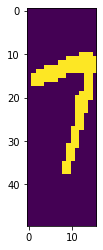

In [145]:
letter_4 = cleaned_4[0:50, separator_columns[3]:separator_columns[4]]
plt.imshow(letter_4)
